In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import random
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
%matplotlib inline

C:\Users\Lidia\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def balance_data(train_0, train_1, times):
    New_train = train_0.append(train_1, ignore_index =True)
    for i in range (times-1):
        New_train = New_train.append(train_1, ignore_index =True)
    New_train = New_train.sample(frac=1).reset_index(drop=True)
    return New_train

In [3]:
def check_gini(classifier, xv, yv):
    yp = classifier.predict_proba(xv)
    fp, tp, _ = roc_curve(yv.ravel(),np.zeros_like(yv))
    fp1, tp1, _ = roc_curve(yv.ravel(), yp[:, 1])
    plt.plot(fp, tp)
    plt.plot(fp1, tp1, "r-")
    plt.show()
    print(2*roc_auc_score(yv, yp[:, 1])-1)

In [4]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249844CD400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024981353C50>]], dtype=object)

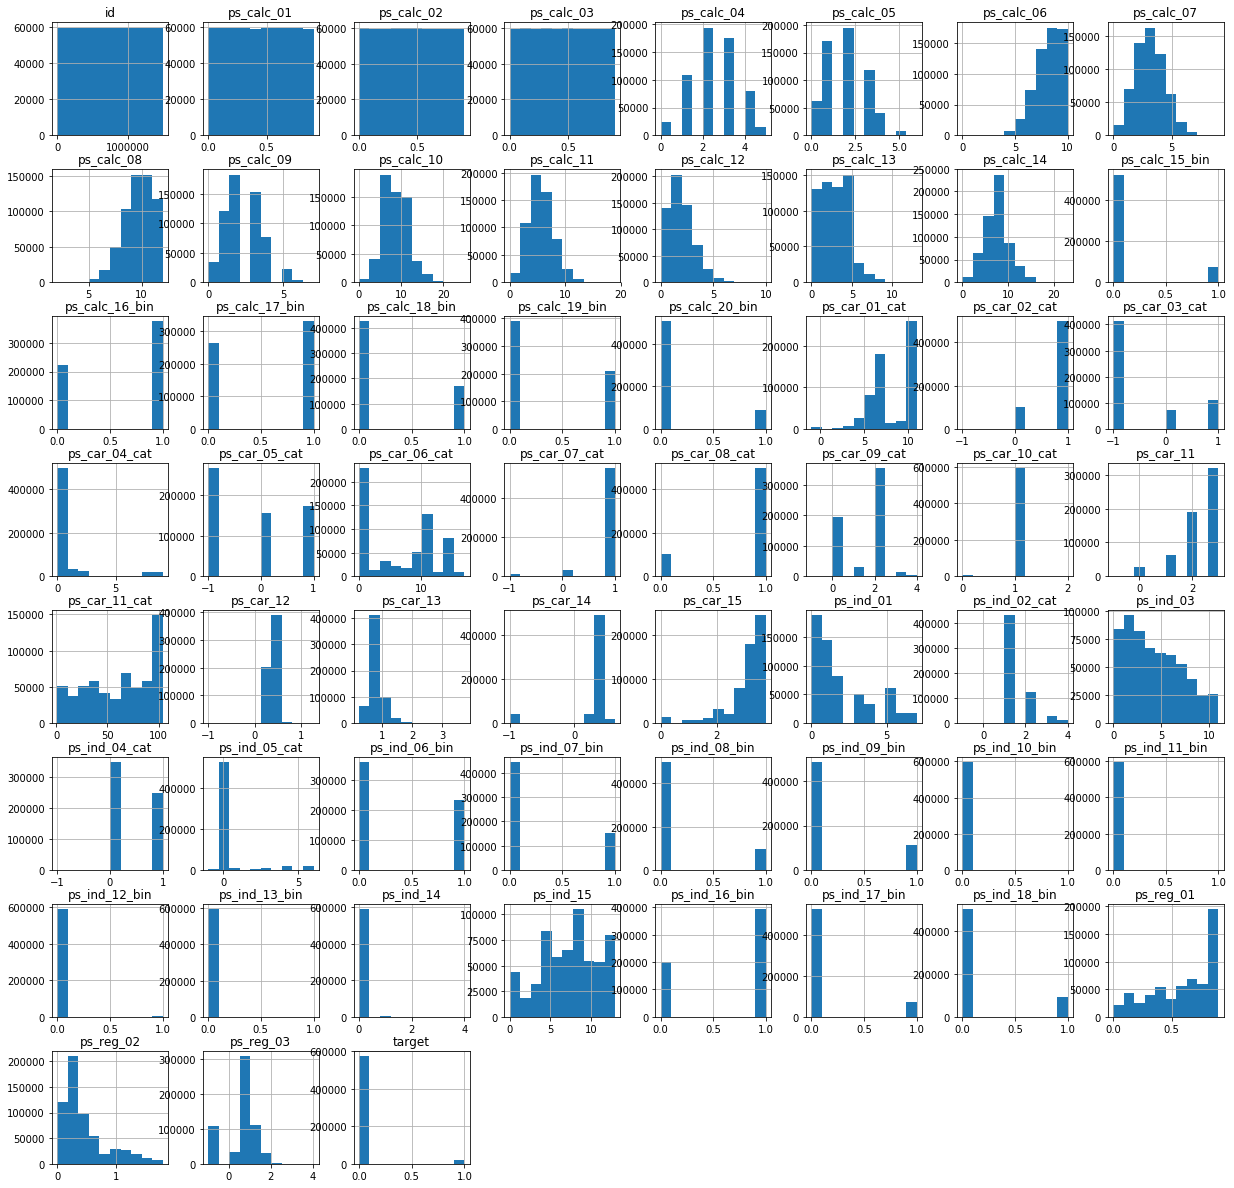

In [10]:
train[train.dtypes[(train.dtypes=="float64")|(train.dtypes=="int64")]
                        .index.values].hist(figsize=[21,21])

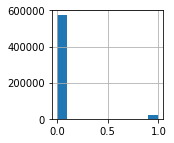

In [12]:
train['target'].hist(figsize=[2,2])

In [5]:
train = train.drop('id',axis=1)
train70, train30 = train_test_split(train,test_size=0.2,random_state=192)

In [6]:
train70 = balance_data(train70[train70.target==0], train70[train70.target==1], 1)
xtr = train70.drop('target',axis=1)
ytr = train70['target']
xvl = train30.drop('target',axis=1)
yvl = train30['target']

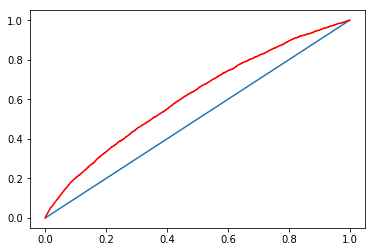

0.224009859369


In [12]:
mlr = MLPClassifier(max_iter=100, hidden_layer_sizes=(30), verbose=True,activation ='tanh', batch_size=2000,tol=0.0001,
                   learning_rate_init=0.01, solver ='lbfgs', learning_rate='adaptive', early_stopping = True)
mlr.fit(MinMaxScaler(feature_range=(-1,1)).fit_transform(xtr),ytr)
check_gini(mlr, MinMaxScaler(feature_range=(-1,1)).fit_transform(xvl), yvl)

[LibLinear]

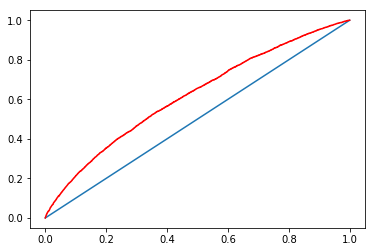

0.236277011851


In [7]:
lr = LogisticRegression(max_iter=100,verbose = 1)
lr.fit(xtr,ytr)
check_gini(lr, xvl, yvl)